<h2>Install Packages</h2>

In [ ]:
#Install NumPy, SciPy, sklearn, pandas, and matplotlib
!pip install -r requirements.txt

<h2>User Preferences</h2>

In [28]:
import numpy as np
import opfunu

In [2]:
# Install git first if not already installed
!apt-get install -y git

# Clone the repository
!git clone https://github.com/victorlei/smop

# Change directory to the cloned repository
%cd smop

# Install the package using setup.py
!python setup.py install --user


'apt-get' is not recognized as an internal or external command,
operable program or batch file.


[WinError 2] The system cannot find the file specified: 'smop'
C:\Users\ELmoor\Desktop\PhD_Work


'git' is not recognized as an internal or external command,
operable program or batch file.


^C


In [6]:
pip install smop


     -------------------------------------- 88.0/88.0 kB 996.6 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 49.6/49.6 kB 2.5 MB/s eta 0:00:00
  Created wheel for smop: filename=smop-0.41-py3-none-any.whl size=49205 sha256=a7e95c82b439421e36eb6f087abe1baa7432b54356783a71e7ca91f224f6a9b4
  Stored in directory: c:\users\elmoor\appdata\local\pip\cache\wheels\d0\03\7e\a10363e9405272c12cb33c24800be0b568194fcedc73f90298
Successfully built smop


In [22]:
def SCHO(N, Max_iteration, lb, ub, dim, fobj) {
    let Destination_position = new Array(dim).fill(0);
    let Destination_fitness = Infinity;
    let Destination_position_second = new Array(dim).fill(0);
    let Convergence_curve = new Array(Max_iteration).fill(0);
    let Position_sort = new Array(N).fill(0).map(() => new Array(dim).fill(0));

    const u = 0.388;
    const m = 0.45;
    const n = 0.5;
    const p = 10;
    const q = 9;
    const Alpha = 4.6;
    const Beta = 1.55;
    const BS = Math.floor(Max_iteration / Beta);
    const ct = 3.6;
    const T = Math.floor(Max_iteration / ct);
    let BSi = 0;
    let BSi_temp = 0;
    let ub_2 = ub;
    let lb_2 = lb;

    let X = initialization(N, dim, ub, lb);
    let Objective_values = new Array(X.length).fill(0);

    for (let i = 0; i < X.length; i++) {
        Objective_values[i] = fobj(X[i]);
        if (Objective_values[i] < Destination_fitness) {
            Destination_position = X[i].slice();
            Destination_fitness = Objective_values[i];
        }
    }
    Convergence_curve[0] = Destination_fitness;
    let t = 2;

    while (t <= Max_iteration) {
        for (let i = 0; i < X.length; i++) {
            for (let j = 0; j < X[i].length; j++) {
                const cosh2 = (Math.exp(t / Max_iteration) + Math.exp(-t / Max_iteration)) / 2;
                const sinh2 = (Math.exp(t / Max_iteration) - Math.exp(-t / Max_iteration)) / 2;
                const r1 = Math.random();
                const A = (p - q * Math.pow(t / Max_iteration, cosh2 / sinh2)) * r1;

                if (t === BSi) {
                    ub_2 = Destination_position[j] + (1 - t / Max_iteration) * Math.abs(Destination_position[j] - Destination_position_second[j]);
                    lb_2 = Destination_position[j] - (1 - t / Max_iteration) * Math.abs(Destination_position[j] - Destination_position_second[j]);
                    if (ub_2 > ub) {
                        ub_2 = ub;
                    }
                    if (lb_2 < lb) {
                        lb_2 = lb;
                    }
                    X = initialization(N, dim, ub_2, lb_2);
                    BSi_temp = BSi;
                    BSi = 0;
                }

                // The first phase of exploration and exploitation
                if (t <= T) {
                    const r2 = Math.random();
                    const r3 = Math.random();
                    const a1 = 3 * (-1.3 * t / Max_iteration + m);
                    const r4 = Math.random();
                    const r5 = Math.random();
                    if (A > 1) {
                        const sinh = (Math.exp(r3) - Math.exp(-r3)) / 2;
                        const cosh = (Math.exp(r3) + Math.exp(-r3)) / 2;
                        const W1 = r2 * a1 * (cosh + u * sinh - 1);
                        if (r5 <= 0.5) {
                            X[i][j] = Destination_position[j] + r4 * W1 * X[i][j];
                        } else {
                            X[i][j] = Destination_position[j] - r4 * W1 * X[i][j];
                        }
                    } else {
                        const sinh = (Math.exp(r3) - Math.exp(-r3)) / 2;
                        const cosh = (Math.exp(r3) + Math.exp(-r3)) / 2;
                        const W3 = r2 * a1 * (cosh + u * sinh);
                        if (r5 <= 0.5) {
                            X[i][j] = Destination_position[j] + r4 * W3 * X[i][j];
                        } else {
                            X[i][j] = Destination_position[j] - r4 * W3 * X[i][j];
                        }
                    }
                } else {
                    const r2 = Math.random();
                    const r3 = Math.random();
                    const a2 = 2 * (-t / Max_iteration + n);
                    const W2 = r2 * a2;
                    const r4 = Math.random();
                    const r5 = Math.random();
                    if (A < 1) {
                        const sinh = (Math.exp(r3) - Math.exp(-r3)) / 2;
                        const cosh = (Math.exp(r3) + Math.exp(-r3)) / 2;
                        X[i][j] = X[i][j] + (r5 * sinh / cosh * Math.abs(W2 * Destination_position[j] - X[i][j]));
                    } else {
                        if (r4 <= 0.5) {
                            X[i][j] = X[i][j] + (Math.abs(0.003 * W2 * Destination_position[j] - X[i][j]));
                        } else {
                            X[i][j] = X[i][j] + (-Math.abs(0.003 * W2 * Destination_position[j] - X[i][j]));
                        }
                    }
                }
            }
            BSi = BSi_temp;
        }

        for (let i = 0; i < X.length; i++) {
            const Flag4ub = X[i].map((val) => val > ub_2);
            const Flag4lb = X[i].map((val) => val < lb_2);
            for (let j = 0; j < X[i].length; j++) {
                X[i][j] = X[i][j] * (!(Flag4ub[j] + Flag4lb[j])) + (ub_2 + lb_2) / 2 * Flag4ub[j] + lb_2 * Flag4lb[j];
            }

            Objective_values[i] = fobj(X[i]);

            if (Objective_values[i] < Destination_fitness) {
                Destination_position = X[i].slice();
                Destination_fitness = Objective_values[i];
            }
        }

        if (t === BS) {
            BSi = BS + 1;
            BS += Math.floor((Max_iteration - BS) / Alpha);
            const temp = new Array(dim).fill(0);
            const temp2 = new Array(N).fill(0).map(() => new Array(dim).fill(0));

            for (let i = 0; i < X.length - 1; i++) {
                for (let j = 0; j < X.length - 1 - i; j++) {
                    if (Objective_values[j] > Objective_values[j + 1]) {
                        temp[j] = Objective_values[j];
                        Objective_values[j] = Objective_values[j + 1];
                        Objective_values[j + 1] = temp[j];
                        temp2[j] = Position_sort[j].slice();
                        Position_sort[j] = Position_sort[j + 1].slice();
                        Position_sort[j + 1] = temp2[j].slice();
                    }
                }
            }

            Destination_position_second = Position_sort[1].slice(); // The second solution
        }

        Convergence_curve[t - 1] = Destination_fitness;
        t++;
    }

    return [Destination_fitness, Destination_position, Convergence_curve];
}


SyntaxError: expected ':' (1678112945.py, line 1)

In [1]:
import matlabparser

ModuleNotFoundError: No module named 'matlabparser'

In [2]:
pip install matlabparser


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement matlabparser (from versions: none)
ERROR: No matching distribution found for matlabparser


In [29]:
!git clone https://github.com/ebranlard/matlab2python

'git' is not recognized as an internal or external command,
operable program or batch file.


In [25]:
python matlab2python.py tests/files/fSpectrum.m -o fSpectrum.py


SyntaxError: invalid syntax (2655640077.py, line 1)

In [9]:
smop -V

NameError: name 'V' is not defined

In [17]:
smop 'SCHO.m'

SyntaxError: invalid syntax (1213483290.py, line 1)

In [1]:
# Select optimizers
# "SSA","PSO","GA","BAT","FFA","GWO","WOA","MVO","MFO","CS","HHO","SCA","JAYA","DE"
optimizer=["SCHO"]

In [2]:
# Select benchmark function"
# "F1","F2","F3","F4","F5","F6","F7","F8","F9","F10","F11","F12","F13","F14","F15","F16","F17","F18","F19"
objectivefunc=["F1"] 

In [3]:
# Select number of repetitions for each experiment. 
# To obtain meaningful statistical results, usually 30 independent runs are executed for each algorithm.
NumOfRuns=1

In [4]:
# Select general parameters for all optimizers (population size, number of iterations) ....
params = {'PopulationSize' : 30, 'Iterations' : 100}

In [5]:
#Choose whether to Export the results in different formats
export_flags = {'Export_avg':True, 'Export_details':True, 
'Export_convergence':True, 'Export_boxplot':True}

<h2>Run Framework</h2>

In [6]:
# Run EvoCluster
from optimizer import run
run(optimizer, objectivefunc, NumOfRuns, params, export_flags)

TypeError: 'module' object is not callable

<h2>Results Files and Plots</h2>

In [35]:
#import some useful packages to view the results' files in colab
import pandas as pd
from IPython.display import Image
import os
import datetime
import ipywidgets as widgets

In [36]:
#Select the experiments folder
foldernames = [filename for filename in os.listdir() if filename.startswith(str(datetime.datetime.now().year))]
drop_folder = widgets.Dropdown(options=foldernames, description='Select folder:')
drop_folder

Dropdown(description='Select folder:', options=('2024-02-01-09-06-06', '2024-02-01-09-53-25', '2024-02-01-09-5…

In [37]:
#Get the selected folder
foldername = drop_folder.value

<h4>Average Results File</h4>

In [39]:
#Show the average results file
filename = foldername +'/experiment.csv' 
df = pd.read_csv(filename)
df.head(4)

,Optimizer,objfname,ExecutionTime,Iter1,Iter2,Iter3,Iter4,Iter5,Iter6,Iter7,...,Iter91,Iter92,Iter93,Iter94,Iter95,Iter96,Iter97,Iter98,Iter99,Iter100
0,edo_algo,F1,7.77,1.283971e+10,1.283971e+10,1.283971e+10,1.283971e+10,1.283971e+10,1.283971e+10,1.283971e+10,...,1.055288e+10,1.055288e+10,1.055288e+10,1.055288e+10,1.055288e+10,1.055288e+10,1.055288e+10,1.055288e+10,1.044799e+10,1.044799e+10
1,edo_algo,F2,8.52,3.092510e+03,3.092510e+03,3.092510e+03,3.092510e+03,3.092510e+03,3.092510e+03,3.092510e+03,...,2.625630e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03
2,edo_algo,F3,7.41,2.590930e+05,2.590930e+05,2.590930e+05,2.590930e+05,2.590930e+05,2.450679e+05,2.347578e+05,...,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05
3,edo_algo,F4,7.66,1.342737e+05,4.996083e+04,4.996083e+04,4.996083e+04,4.996083e+04,4.996083e+04,4.996083e+04,...,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04


<h4>Detailed Results File</h4>

In [40]:
#Show the detailed results file
filename = foldername +'/experiment_details.csv' 
df = pd.read_csv(filename)
df.head(12)

,Optimizer,objfname,ExecutionTime,Best,Iter1,Iter2,Iter3,Iter4,Iter5,Iter6,...,Iter91,Iter92,Iter93,Iter94,Iter95,Iter96,Iter97,Iter98,Iter99,Iter100
0,edo_algo,F1,7.770033,0,1.283971e+10,1.283971e+10,1.283971e+10,1.283971e+10,1.283971e+10,1.283971e+10,...,1.055288e+10,1.055288e+10,1.055288e+10,1.055288e+10,1.055288e+10,1.055288e+10,1.055288e+10,1.055288e+10,1.044799e+10,1.044799e+10
1,edo_algo,F2,8.519524,0,3.092509e+03,3.092509e+03,3.092509e+03,3.092509e+03,3.092509e+03,3.092509e+03,...,2.625633e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03,2.577740e+03
2,edo_algo,F3,7.407150,0,2.590931e+05,2.590931e+05,2.590931e+05,2.590931e+05,2.590931e+05,2.450679e+05,...,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05,1.792247e+05
3,edo_algo,F4,7.655699,0,1.342737e+05,4.996083e+04,4.996083e+04,4.996083e+04,4.996083e+04,4.996083e+04,...,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04,1.016494e+04
4,edo_algo,F5,9.343099,0,8.807751e+06,8.807751e+06,8.807751e+06,8.807751e+06,8.807751e+06,6.991192e+06,...,8.993642e+05,8.993642e+05,8.993642e+05,8.993642e+05,8.993642e+05,8.993642e+05,8.993642e+05,8.993642e+05,8.993642e+05,8.993642e+05
5,edo_algo,F6,13.439376,0,9.410758e+07,9.410758e+07,9.410758e+07,2.836145e+06,1.683603e+06,1.683603e+06,...,3.217970e+04,3.217970e+04,3.217970e+04,3.217970e+04,3.217970e+04,3.217970e+04,3.217970e+04,3.217970e+04,3.217970e+04,3.217970e+04
6,edo_algo,F7,10.014928,0,1.029932e+09,1.029932e+09,1.029932e+09,1.029932e+09,1.029932e+09,1.029932e+09,...,1.022602e+09,1.022602e+09,1.022602e+09,1.022602e+09,1.022602e+09,1.022602e+09,1.022602e+09,1.022602e+09,1.022602e+09,1.022602e+09
7,edo_algo,F8,15.568208,0,4.909098e+03,4.045952e+03,4.045952e+03,2.939665e+03,2.432660e+03,2.432660e+03,...,2.401669e+03,2.401669e+03,2.401669e+03,2.401669e+03,2.401669e+03,2.401669e+03,2.401669e+03,2.401669e+03,2.401669e+03,2.401669e+03
8,edo_algo,F9,15.991000,0,1.188362e+04,1.188362e+04,1.188362e+04,1.188362e+04,1.188362e+04,1.188362e+04,...,1.178241e+04,1.178241e+04,1.178241e+04,1.178241e+04,1.178241e+04,1.178241e+04,1.178241e+04,1.178241e+04,1.178241e+04,1.178241e+04
9,edo_algo,F10,15.436592,0,3.510656e+03,3.510656e+03,3.510656e+03,3.510656e+03,3.510656e+03,3.510656e+03,...,3.365799e+03,3.365799e+03,3.365799e+03,3.365799e+03,3.365799e+03,3.365799e+03,3.365799e+03,3.365799e+03,3.365799e+03,3.365799e+03


<h4>Convergence Curve Plot</h4>

In [14]:
#Select convergence curve to show
filenames = [filename for filename in os.listdir(foldername) if filename.startswith('convergence')]

drop_plot_convergence = widgets.Dropdown(options=filenames, description='Select plot:')
drop_plot_convergence

Dropdown(description='Select plot:', options=(), value=None)

In [15]:
#Show selected convergence curve
Image(foldername +'/' + drop_plot_convergence.value)

TypeError: can only concatenate str (not "NoneType") to str

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

filename = foldername + '/experiment_details.csv'
df = pd.read_csv(filename)

# Read the data into a pandas DataFrame
# Plot convergence curves for each algorithm and function
algorithms = df['Optimizer'].unique()
functions = df['objfname'].unique()

print(algorithms)
print(functions)

# Set up a grid of subplots, 10 figures in total
num_figures = len(functions)
fig, axes = plt.subplots(num_figures, 1, figsize=(10, 5 * num_figures))

for i, func in enumerate(functions):
    ax = axes[i]
    for algo in algorithms:
        subset = df[(df['Optimizer'] == algo) & (df['objfname'] == func)]
        # Convert the values to string before using them in the label
        ax.plot(subset.columns[3:], subset.iloc[1, 3:].astype(str), label=f"{algo} - {func}")

    ax.set_xlabel("Iterations")
    ax.set_ylabel("Objective Value")
    ax.set_title(f"Convergence Curves - {func}")
    ax.legend()

plt.tight_layout()
plt.show()


['edo_algo' 'PSO' 'SSA' 'GA' 'BAT' 'FFA' 'GWO' 'WOA' 'MVO' 'MFO']
['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10']



KeyboardInterrupt



['edo_algo' 'edo_algo_en']
['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10']


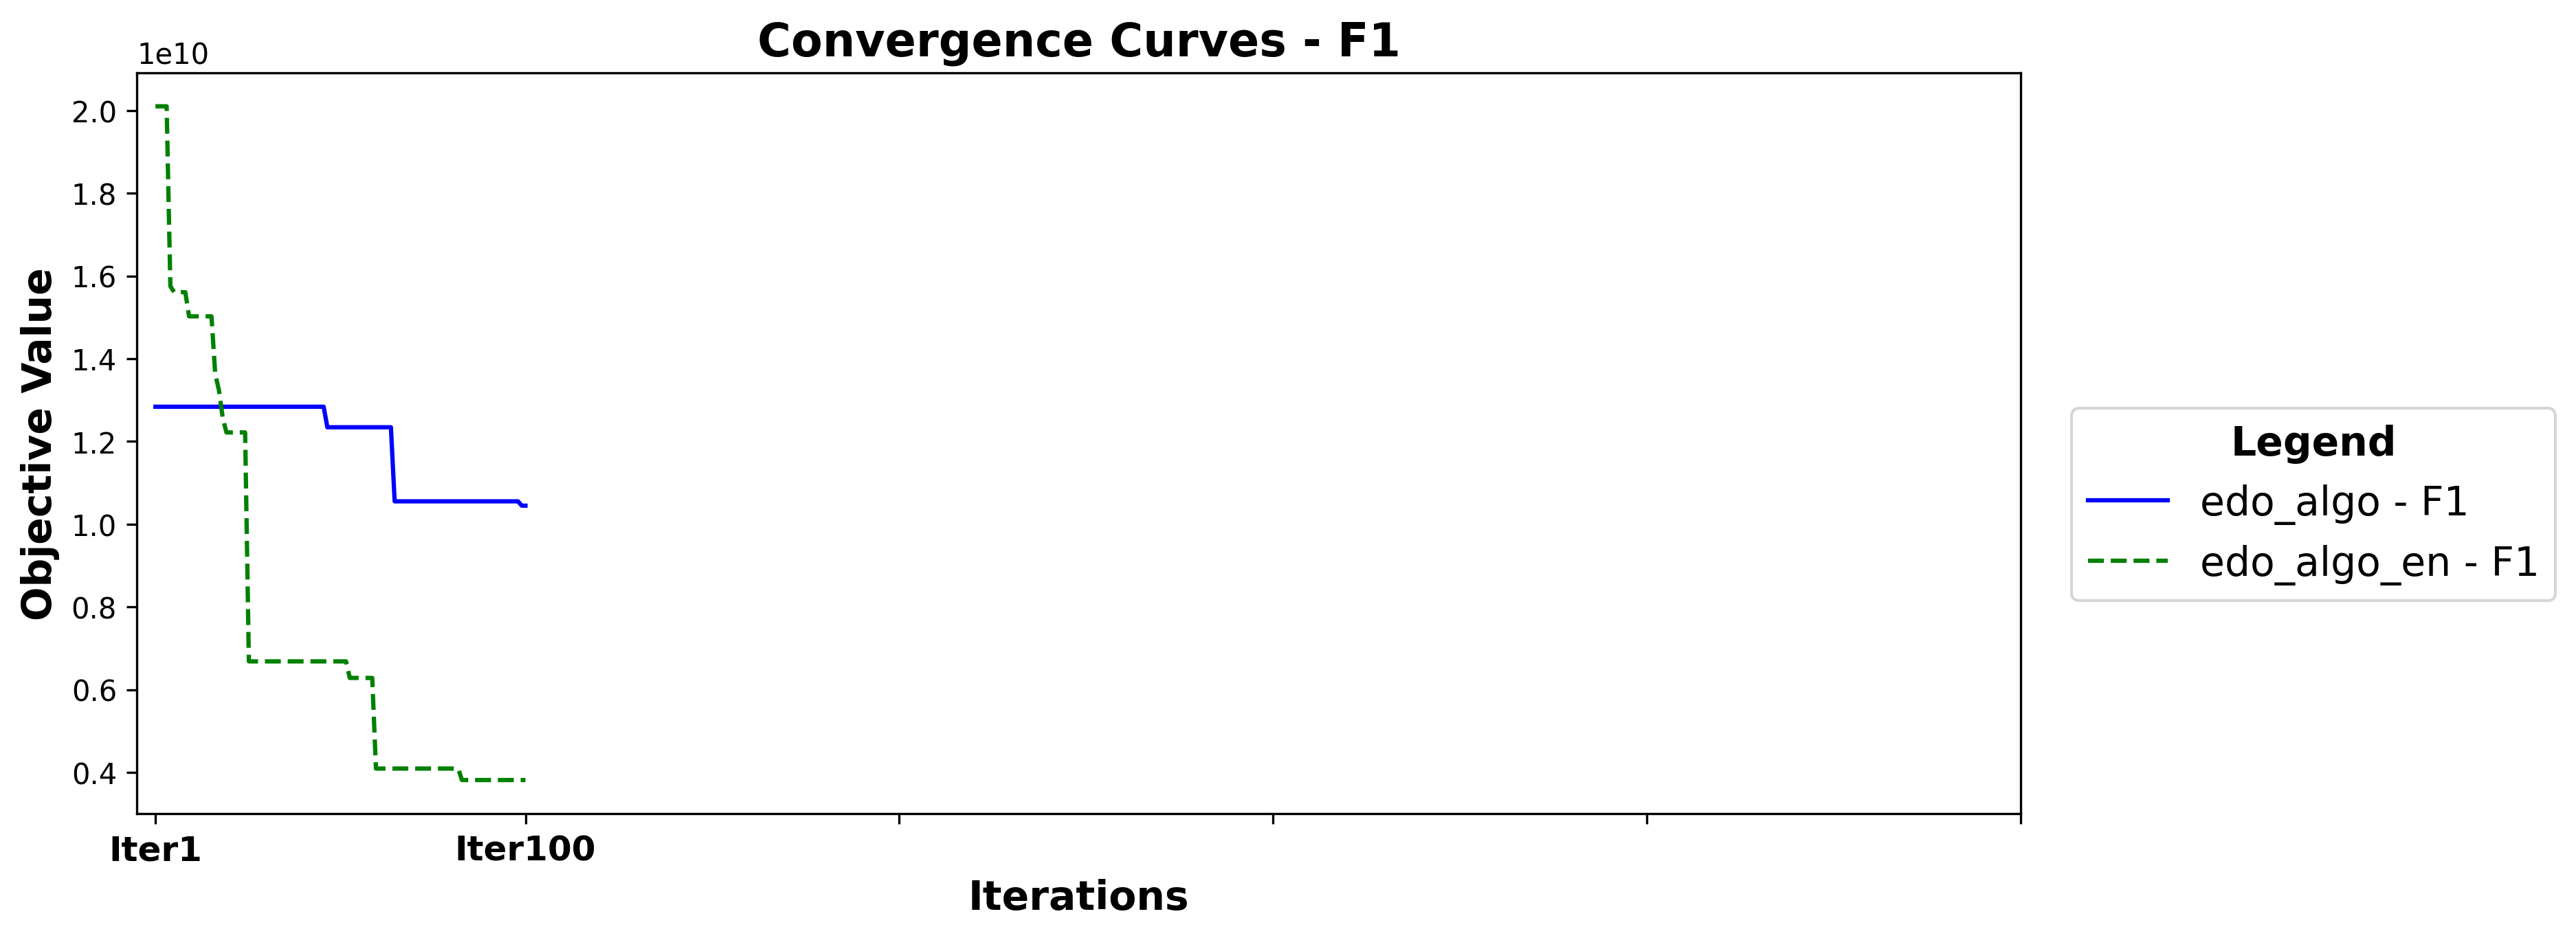

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

filename = foldername + '/experiment.csv'
df = pd.read_csv(filename)

# Read the data into a pandas DataFrame
# Plot convergence curves for the first function and all algorithms
algorithms = df['Optimizer'].unique()
functions = df['objfname'].unique()

print(algorithms)
print(functions)

# Choose the first function for plotting
selected_func = functions[0]

# Set up a single figure for all convergence curves
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Define line styles and colors for each algorithm
line_styles = ['-', '--', '-.', ':']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for i, algo in enumerate(algorithms):
    subset = df[(df['Optimizer'] == algo) & (df['objfname'] == selected_func)]
    # Convert the values to string before using them in the label
    ax.plot(subset.columns[3:], subset.iloc[0, 3:].astype(float),
            label=f"{algo} - {selected_func}",
            linestyle=line_styles[i % len(line_styles)],
            color=colors[i % len(colors)])

ax.set_xlabel("Iterations", fontsize=14, fontweight='bold')  # Adjust font size and make it bold
ax.set_ylabel("Objective Value", fontsize=14, fontweight='bold')  # Adjust font size and make it bold
ax.set_title(f"Convergence Curves - {selected_func}", fontsize=16, fontweight='bold')  # Adjust font size and make it bold
plt.xticks([0, 99, 199, 299, 399, 499], fontsize=12, fontweight='bold')  # Adjust font size

# Adjust layout and place legend outside the plot
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)  # Increase the bottom margin

# Get legend and customize title properties
legend = fig.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title='Legend', fontsize=14)
legend.get_title().set_fontsize(14)
legend.get_title().set_fontweight('bold')
plt.savefig(foldername + '/convergence_curves-F1.png', bbox_inches='tight')  # Set the desired filename and file format

plt.show()


In [42]:
import pandas as pd
import matplotlib.pyplot as plt

filename = foldername + '/experiment.csv'
df = pd.read_csv(filename)

# Read the data into a pandas DataFrame
# Plot convergence curves for all functions and all algorithms
algorithms = df['Optimizer'].unique()
functions = df['objfname'].unique()

print(algorithms)
print(functions)

for selected_func in functions:
    # Set up a new figure for each convergence curve
    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

    # Define line styles and colors for each algorithm
    line_styles = ['-', '--', '-.', ':']
    colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

    for i, algo in enumerate(algorithms):
        subset = df[(df['Optimizer'] == algo) & (df['objfname'] == selected_func)]
        # Convert the values to string before using them in the label
        ax.plot(subset.columns[3:], subset.iloc[0, 3:].astype(float),
                label=f"{algo} - {selected_func}",
                linestyle=line_styles[i % len(line_styles)],
                color=colors[i % len(colors)])

    ax.set_xlabel("Iterations", fontsize=14, fontweight='bold')  # Adjust font size and make it bold
    ax.set_ylabel("Objective Value", fontsize=14, fontweight='bold')  # Adjust font size and make it bold
    ax.set_title(f"Convergence Curves - {selected_func}", fontsize=16, fontweight='bold')  # Adjust font size and make it bold
    plt.xticks([0, 99, 199, 299, 399, 499], fontsize=12, fontweight='bold')  # Adjust font size

    # Adjust layout and place legend outside the plot
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)  # Increase the bottom margin

    # Get legend and customize title properties
    legend = ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, title='Legend', fontsize=14)
    legend.get_title().set_fontsize(14)
    legend.get_title().set_fontweight('bold')
    plt.savefig(foldername + f'/convergence_curves-{selected_func}.png', bbox_inches='tight')  # Set the desired filename and file format

    # Close the figure to prevent transparency issues
    plt.close(fig)

plt.show()


['edo_algo' 'edo_algo_en']
['F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F10']


['edo_algo' 'edo_algo_en']
['F1']


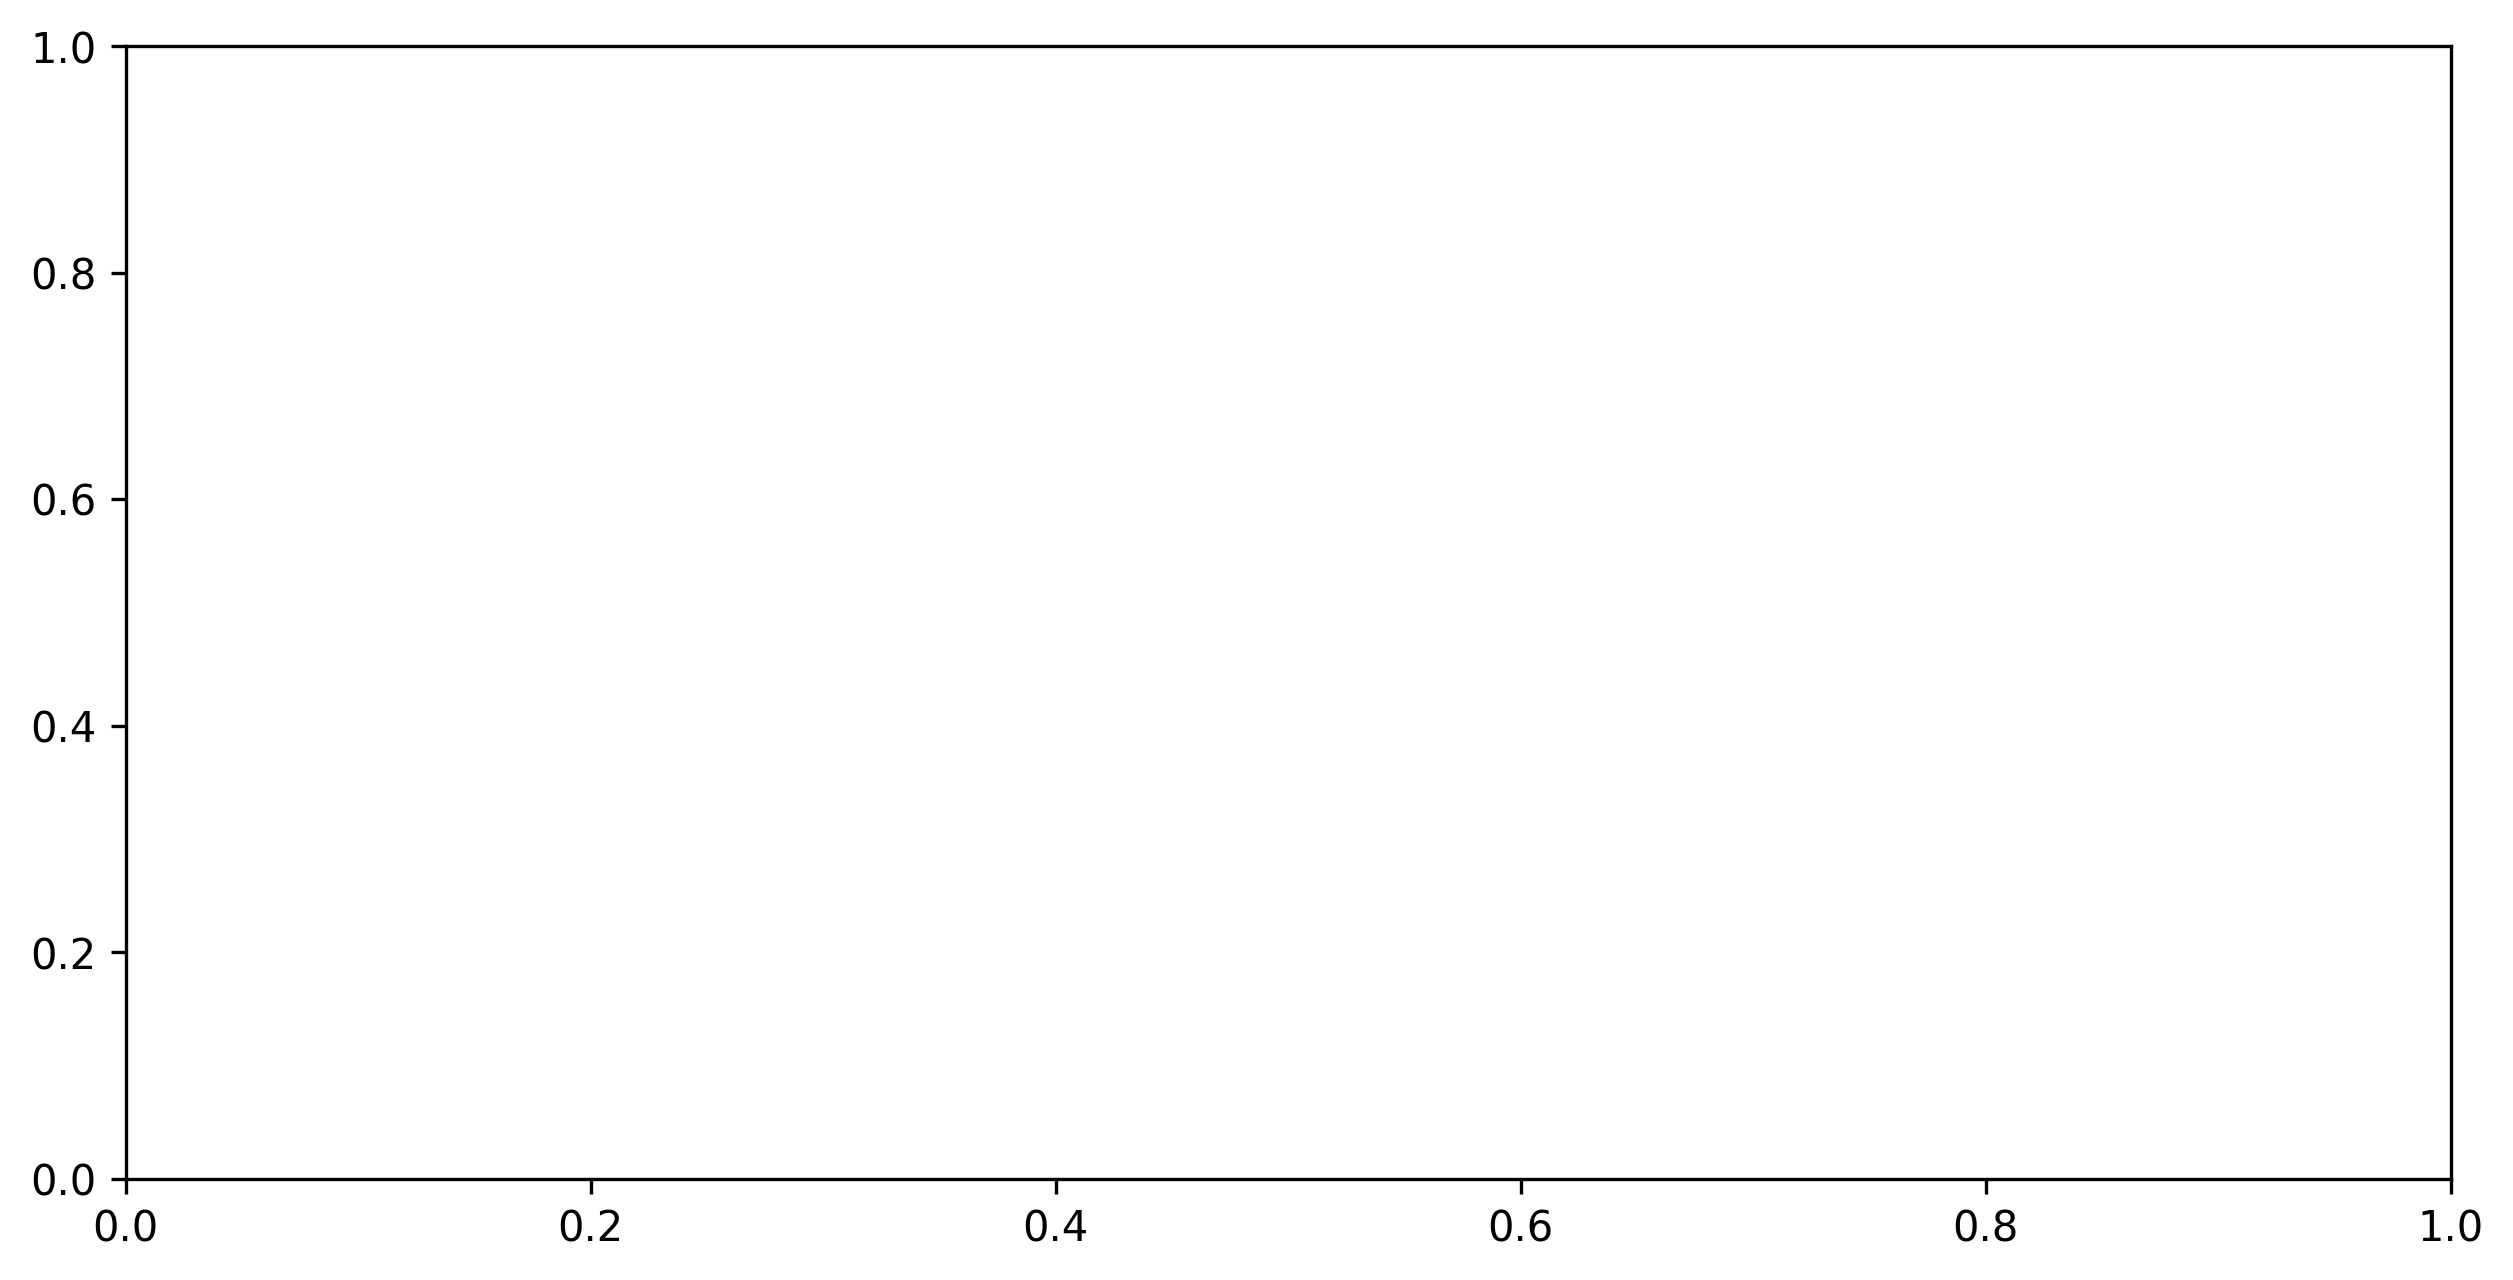

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap

filename = foldername + '/experiment.csv'
df = pd.read_csv(filename)

# Read the data into a pandas DataFrame
# Plot convergence curves for all functions and all algorithms
algorithms = df['Optimizer'].unique()
functions = df['objfname'].unique()

print(algorithms)
print(functions)

# Set up a single figure for all convergence curves
fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

# Define line styles and colors for each algorithm
line_styles = ['-', '--', '-.', ':']
cmap = get_cmap('viridis')  # You can choose other colormaps

for selected_func in functions:
    num_algorithms = len(algorithms)
    colors = [cmap(i / num_algorithms) for i in range(num_algorithms)]

    # Set up a new figure for each boxplot
    fig, ax = plt.subplots(figsize=(10, 5), dpi=300)

    for i, algo in enumerate(algorithms):
        subset = df[(df['Optimizer'] == algo) & (df['objfname'] == selected_func)]
        # Filter out non-numeric values before using them in the boxplot
        numeric_values = subset.iloc[0, 3:].apply(pd.to_numeric, errors='coerce')

        # Boxplot customization
        if i < len(colors):
            boxprops = dict(facecolor=colors[i], color=colors[i], linewidth=2)
            medianprops = dict(color='black', linewidth=2)
            whiskerprops = dict(color=colors[i], linewidth=2)
            capprops = dict(color=colors[i], linewidth=2)
            flierprops = dict(marker='o', markerfacecolor=colors[i], markersize=8, linestyle='none')

            ax.boxplot([numeric_values.dropna()], positions=[i], showfliers=False, boxprops=boxprops,
                       medianprops=medianprops, whiskerprops=whiskerprops, capprops=capprops, flierprops=flierprops, patch_artist=True)
        else:
            print(f"Not enough colors for all algorithms. Add more colors to the 'colors' list or use a colormap.")

    ax.set_xlabel("Algorithms", fontsize=14, fontweight='bold')
    ax.set_ylabel("Objective Value", fontsize=14, fontweight='bold')
    ax.set_title(f"Boxplot - {selected_func}", fontsize=16, fontweight='bold')
    plt.xticks(range(len(algorithms)), algorithms, fontsize=12, fontweight='bold')

    # Adjust layout and place legend outside the plot
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.2)

    plt.savefig(foldername + f'/boxplot-{selected_func}.png', bbox_inches='tight')

    # Close the figure to prevent transparency issues
    plt.close(fig)

plt.show()


<h4>Box Plot</h4>

In [36]:
#Select boxplot to show
filenames = [filename for filename in os.listdir(foldername) if filename.startswith('boxplot')]

drop_boxplot = widgets.Dropdown(options=filenames, description='Select plot:')
drop_boxplot

Dropdown(description='Select plot:', options=('boxplot-F1.png',), value='boxplot-F1.png')

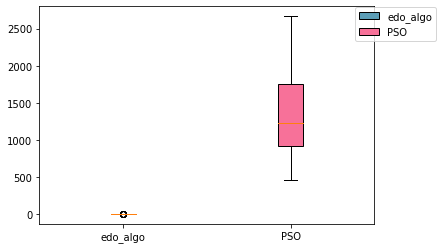

In [37]:
#Show selected boxplot
Image(foldername +'/' + drop_boxplot.value)

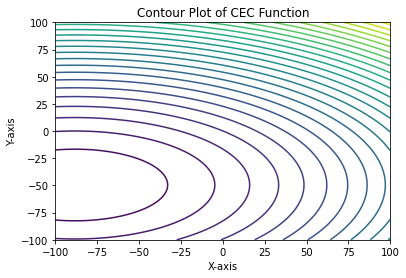

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from opfunu.cec_based import F12020

def plot_cec_contour(func, lb, ub, resolution=100):
    x = np.linspace(lb, ub, resolution)
    y = np.linspace(lb, ub, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    for i in range(resolution):
        for j in range(resolution):
            solution = np.array([X[i, j], Y[i, j], 0, 0, 0, 0, 0, 0, 0, 0])  # Create a 10-dimensional solution vector
            Z[i, j] = func.evaluate(solution)

    plt.contour(X, Y, Z, levels=30, cmap='viridis')
    plt.xlabel('X-axis')
    plt.ylabel('Y-axis')
    plt.title(f'Contour Plot of CEC Function')
    plt.show()

# Example usage:
cec_func = F12020(ndim=10)
lb, ub = -100, 100
plot_cec_contour(cec_func, lb, ub)


In [46]:
print(np.arange(-100, 100, 40))

[-100  -60  -20   20   60]


PSO is optimizing  "F1"
['At iteration 1 the best fitness is 12237173177.682032']
['At iteration 2 the best fitness is 12237173177.682032']
['At iteration 3 the best fitness is 12237173177.682032']
['At iteration 4 the best fitness is 12237173177.682032']
['At iteration 5 the best fitness is 12237173177.682032']
['At iteration 6 the best fitness is 12237173177.682032']
['At iteration 7 the best fitness is 12237173177.682032']
['At iteration 8 the best fitness is 12237173177.682032']
['At iteration 9 the best fitness is 11054512542.725077']
['At iteration 10 the best fitness is 10150521909.440157']
['At iteration 11 the best fitness is 9439580432.54219']
['At iteration 12 the best fitness is 8597444281.588804']
['At iteration 13 the best fitness is 8305978154.06583']
['At iteration 14 the best fitness is 7978249133.328085']
['At iteration 15 the best fitness is 7865556243.370217']
['At iteration 16 the best fitness is 7865556243.370217']
['At iteration 17 the best fitness is 7593688096.

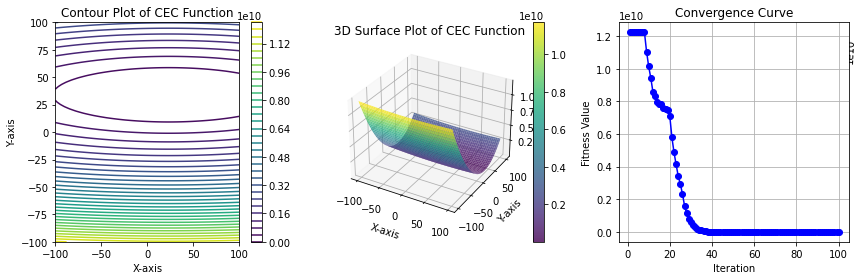

In [177]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from opfunu.cec_based import F52020
import optimizers.PSO as pso

def plot_cec_surface_and_contour(func, lb, ub, resolution, max_iterations=100):
    x = np.linspace(lb, ub, resolution)
    y = np.linspace(lb, ub, resolution)
    X, Y = np.meshgrid(x, y)
    Z = np.zeros_like(X)

    convergence_curve = []  # Store function values over iterations

    for i in range(resolution):
        for j in range(resolution):
            result = np.concatenate([np.ones(5) * x[i], np.ones(5) * y[j]])
            Z[i, j] = func.evaluate(result)

    # Convergence curve
    # Example: Evaluate the function at a specific point in the search space
    solution = np.random.uniform(lb, ub, size=10)  # Replace this with your optimization algorithm
    x = pso.PSO(getattr(benchmarksdeep, "F1"), lb, ub, 10, 10, 100)
    function_value = func.evaluate(solution)
    convergence_curve = x.convergence

    fig = plt.figure(figsize=(12, 4))

    # Contour plot
    ax1 = fig.add_subplot(131)
    contours = ax1.contour(X, Y, Z, levels=30, cmap='viridis')
    ax1.set_xlabel('X-axis')
    ax1.set_ylabel('Y-axis')
    ax1.set_title('Contour Plot of CEC Function')
    plt.colorbar(contours, ax=ax1)

    # 3D surface plot
    ax2 = fig.add_subplot(132, projection='3d')
    surface = ax2.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
    ax2.set_xlabel('X-axis')
    ax2.set_ylabel('Y-axis')
    ax2.set_zlabel('', labelpad=200)
    ax2.set_title('3D Surface Plot of CEC Function')
    plt.colorbar(surface, ax=ax2)

    # Convergence curve plot (2D)
    ax3 = fig.add_subplot(133)
    ax3.plot(range(1, max_iterations + 1), convergence_curve, marker='o', linestyle='-', color='b')
    ax3.set_xlabel('Iteration')
    ax3.set_ylabel('Fitness Value')
    ax3.set_title('Convergence Curve')
    ax3.grid(True)

    plt.tight_layout()  # Adjust layout for better spacing
    plt.show()

# Example usage for CEC function F19:
cec_func = F52020(ndim=10)
lb, ub = -100, 100
plot_cec_surface_and_contour(cec_func, lb, ub, 100, max_iterations=100)


(100,)


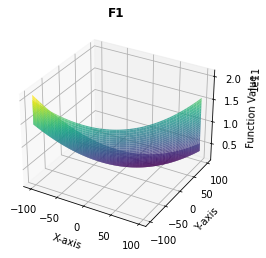

In [128]:
import numpy as np
import matplotlib.pyplot as plt
from opfunu.cec_based import F12020

def my_func_plot(func_No):
    Function_num = 'F1'
    lb, ub = -100, 100
    func = F12020(ndim=10)

    rate = (abs(lb) + abs(ub)) / 100
    x = np.arange(lb, ub, rate)
    y = x
    print(np.shape(x))

    if func_No > 10:
        y_values = func.evaluate(np.array([x, x]))  # Use the evaluate method directly
        z = np.outer(y_values, y_values)
    else:
        L = len(x)
        z = np.empty((L, L))

        for i in range(L):
            for j in range(L):
                result = np.concatenate([np.ones(15) * x[i], np.ones(15) * y[j]])
                z[i, j] = func.evaluate(result)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.plot_surface(X=x, Y=y, Z=z, cmap='viridis', alpha=0.8)

    ax.set_xlabel('X-axis')
    ax.set_ylabel('Y-axis')
    ax.set_zlabel('Function Value')
    ax.set_title(Function_num, fontweight='bold')

    plt.show()

# Example usage:
my_func_plot(1)  # Replace with the desired function number


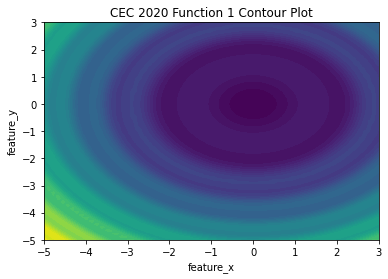

In [59]:
import matplotlib.pyplot as plt
import numpy as np

def cec_2020_function_1(x, y):
    return 0.5 * (x**2 + y**2) + np.sin(x**2 + y**2)

feature_x = np.linspace(-5.0, 3.0, 70)
feature_y = np.linspace(-5.0, 3.0, 70)

[X, Y] = np.meshgrid(feature_x, feature_y)

fig, ax = plt.subplots(1, 1)

Z = cec_2020_function_1(X, Y)

ax.contourf(X, Y, Z, levels=50, cmap='viridis')  # You can adjust levels and cmap as per your preference

ax.set_title('CEC 2020 Function 1 Contour Plot')
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')

plt.show()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def cec_2020_function_1(x, y):
    return x**2 + y**2 - 10 * np.cos(2 * np.pi * x) - 10 * np.cos(2 * np.pi * y) + 20

def cec_2020_function_2(x, y):
    return (x + 2)**2 + (y - 1)**2

def cec_2020_function_3(x, y):
    return x**2 + 2 * y**2 + 25 * (np.sin(2 * np.pi * x) + np.sin(2 * np.pi * y)) + 30

def cec_2020_function_4(x, y):
    return (x - 2)**2 + (y + 3)**2 + 2 * np.sin(2 * np.pi * x) + 3 * np.sin(2 * np.pi * y)

def cec_2020_function_5(x, y):
    return 0.5 * (x**2 + y**2) + np.sin(x**2 + y**2)

def cec_2020_function_6(x, y):
    return x**2 - y**2

def cec_2020_function_7(x, y):
    return (x - 1)**2 + (y + 2)**2 + np.exp(-(x - 1)**2 - (y + 2)**2)

def cec_2020_function_8(x, y):
    return (x + 3)**2 + (y - 1)**2 + np.sin(2 * np.pi * (x + 3)) + np.sin(2 * np.pi * (y - 1))

def cec_2020_function_9(x, y):
    return 0.1 * (x**2 + y**2) + np.sin(3 * np.pi * x) + np.sin(3 * np.pi * y)

def cec_2020_function_10(x, y):
    return 0.5 * (x**2 + y**2) + np.sin(x**2 + y**2)

# Define the range of features
feature_x = np.linspace(-5.0, 5.0, 100)
feature_y = np.linspace(-5.0, 5.0, 100)

# Create a meshgrid
X, Y = np.meshgrid(feature_x, feature_y)

# Calculate Z values for the function
Z = cec_2020_function_4(X, Y)

# Create a 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surface = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='k')

# Add labels and title
ax.set_xlabel('feature_x')
ax.set_ylabel('feature_y')
ax.set_zlabel('Function Value')
ax.set_title('CEC 2020 Function 1 - 3D Surface Plot')

# Add a colorbar
fig.colorbar(surface, ax=ax, shrink=0.5, aspect=10)

plt.show()


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def cec_2020_function_1(x, y):
    return x**2 + 2 * y**2 + 25 * (np.sin(2 * np.pi * x) + np.sin(2 * np.pi * y)) + 30

# Define the range of features
feature_x = np.linspace(-5.0, 5.0, 100)
feature_y = np.linspace(-5.0, 5.0, 100)

# Create a meshgrid
X, Y = np.meshgrid(feature_x, feature_y)

# Plot the search space without function values
plt.figure(figsize=(8, 6))
plt.imshow(X, extent=(feature_x.min(), feature_x.max(), feature_y.min(), feature_y.max()), origin='lower', cmap='viridis')
plt.colorbar(label='Feature Value')
plt.title('Search Space for CEC 2020 Function 1')
plt.xlabel('feature_x')
plt.ylabel('feature_y')

plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def cec20_func(x, func_num):
    # Implementation of your CEC 2020 function here
    # Replace this with the actual implementation of your functions
    pass

def initialization(search_agents_no, dim, ub, lb):
    return np.random.uniform(lb, ub, size=(search_agents_no, dim))

def my_func_plot(func_num):
    # Implementation of your function plot
    pass

def my_func_contour_plot(func_num):
    # Implementation of your contour plot
    pass

def EO_en(search_agents_no, max_iteration, lb, ub, dim, fobj, func_num, positions):
    # Implementation of your optimization algorithm
    # Replace this with the actual implementation of your algorithm
    pass

def main():
    i = 5
    search_agents_no = 50  # Number of search agents
    lb = -100
    ub = 100
    max_iteration = 100
    dim = 30

    for i in range(9, 10):
        fun_no = i
        fno = str(fun_no)

        function_name = 'F' + fno
        title = ''

        lb = np.ones(dim) * lb  # lower boundary
        ub = np.ones(dim) * ub
        positions = initialization(search_agents_no, dim, ub, lb)

        best_score, attacker_pos, conv_fit, div = EO_en(search_agents_no, max_iteration, -100, 100, dim, cec20_func, fun_no, positions)

        plt.figure(figsize=(14, 3.5))

        # Draw search space
        plt.subplot(1, 4, 1)
        my_func_plot(fun_no)
        plt.title(function_name, fontsize=14)
        plt.xlabel('x_1', fontsize=14)
        plt.ylabel('x_2', fontsize=14)
        plt.box(True)
        plt.axis('tight')

        plt.subplot(1, 4, 2)
        plt.contourf
        my_func_contour_plot(fun_no)
        plt.box(True)
        plt.axis('tight')

        plt.subplot(1, 4, 3)
        plt.plot(np.sort(np.mean(conv_fit, axis=0))[::-1], color='g')
        plt.title('Average fitness history', fontweight='bold', fontsize=14)
        plt.box(True)

        plt.subplot(1, 4, 4)
        plt.plot(conv_fit, color='r')
        plt.title('Convergence curve', fontweight='bold', fontsize=14)
        plt.box(True)
        plt.axis('tight')
        plt.yscale('log')
        plt.xlabel('Iteration#', fontsize=14)
        plt.ylabel('Best score obtained so far', fontsize=14)

        plt.savefig(f'Qualitative-F{i}.png')
        plt.savefig(f'Qualitative-F{i}.eps')
        plt.savefig(f'Qualitative-F{i}.fig')

if __name__ == "__main__":
    main()
